In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#import the sklearn for data set, linear regression model and also to split the train and test data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
df = pd.read_csv("Global_Landslide_Catalog_Export (4).csv", usecols = ['country_name','landslide_trigger','fatality_count','injury_count'], na_values=['NaN'])
print(df)

      landslide_trigger  fatality_count  injury_count   country_name
0                  rain            11.0           NaN          China
1              downpour             0.0           NaN  United States
2              downpour            10.0           NaN           Peru
3               monsoon             1.0           NaN          Nepal
4      tropical_cyclone             0.0           NaN    Philippines
...                 ...             ...           ...            ...
11028              rain            27.0           0.0            NaN
11029             other             2.0           0.0            NaN
11030           unknown             1.0           0.0            NaN
11031          downpour            24.0           NaN            NaN
11032      construction             2.0           0.0            NaN

[11033 rows x 4 columns]


In [28]:
print(df)

      landslide_trigger  fatality_count  injury_count   country_name
0                  rain            11.0           NaN          China
1              downpour             0.0           NaN  United States
2              downpour            10.0           NaN           Peru
3               monsoon             1.0           NaN          Nepal
4      tropical_cyclone             0.0           NaN    Philippines
...                 ...             ...           ...            ...
11028              rain            27.0           0.0            NaN
11029             other             2.0           0.0            NaN
11030           unknown             1.0           0.0            NaN
11031          downpour            24.0           NaN            NaN
11032      construction             2.0           0.0            NaN

[11033 rows x 4 columns]


In [29]:
df.shape

(11033, 4)

In [30]:
df.head()

,landslide_trigger,fatality_count,injury_count,country_name
0,rain,11.0,NaN,China
1,downpour,0.0,NaN,United States
2,downpour,10.0,NaN,Peru
3,monsoon,1.0,NaN,Nepal
4,tropical_cyclone,0.0,NaN,Philippines


In [31]:
df.describe()

,fatality_count,injury_count
count,9648.000000,5359.000000
mean,3.219424,0.751819
std,59.886178,8.458955
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,5000.000000,374.000000


In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   landslide_trigger  11010 non-null  object 
 1   fatality_count     9648 non-null   float64
 2   injury_count       5359 non-null   float64
 3   country_name       9471 non-null   object 
dtypes: float64(2), object(2)
memory usage: 344.9+ KB
None


In [33]:
#preparing the data - preprocessing 

#look for any null values
df.isnull().sum()

landslide_trigger      23
fatality_count       1385
injury_count         5674
country_name         1562
dtype: int64

In [34]:
df = df.fillna(0)

In [35]:
#preparing the data - preprocessing 

#look for any null values
df.isnull().sum()

landslide_trigger    0
fatality_count       0
injury_count         0
country_name         0
dtype: int64

In [36]:
df.describe()

,fatality_count,injury_count
count,11033.000000,11033.000000
mean,2.815281,0.365177
std,56.011137,5.907061
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,5000.000000,374.000000


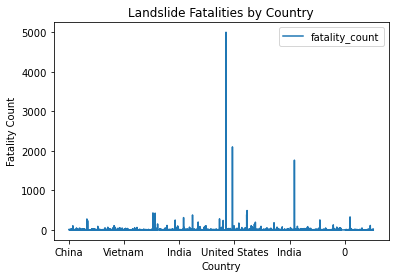

In [37]:
df.plot(x='country_name', y='fatality_count', style='-')
plt.title('Landslide Fatalities by Country')
plt.xlabel('Country')
plt.ylabel('Fatality Count')
plt.show()

In [38]:
correlation_matrix = df.corr().round(2)
print(correlation_matrix)

                fatality_count  injury_count
fatality_count            1.00          0.07
injury_count              0.07          1.00


Text(0, 0.5, 'Injury')

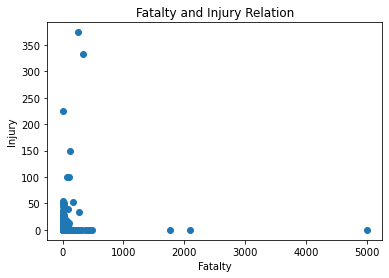

In [39]:
#since the correlation of our target variable MEDV is maximum with the RM let us take a look at that feature for consideration

feature = df['fatality_count']
target = df['injury_count']
plt.scatter(feature,target, marker='o')
plt.title('Fatalty and Injury Relation')
plt.xlabel('Fatalty')
plt.ylabel('Injury')

In [55]:
#data for preparation
#we are taking only RM for demonstrating simple linear regression for more accurate results,
#multiple linear regression can also be considered

x=df[['injury_count']]
y=df['fatality_count']

In [65]:
# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8826, 1)
(2207, 1)
(8826,)
(2207,)


In [70]:
#creating the linear regression model

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

Text(0, 0.5, 'Dependent variable')

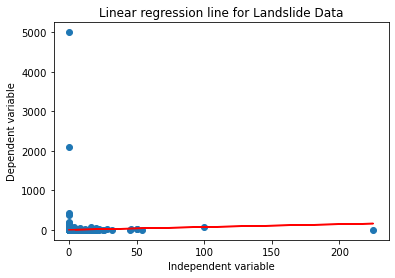

In [64]:
#get the predicted variables and plot the regression line

Y_pred = linear_model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color ='r')
plt.title("Linear regression line for Landslide Data")
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

In [8]:
#performance of the linear model. Gives R2 score

print(linear_model.score(X_test, Y_test))

NameError: name 'linear_model' is not defined

In [24]:
print(mean_squared_error(Y_test,Y_pred))

11353.437495496484
